In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ReLU(preactivation):
  # Equation: activation = max(0, preactivation)
  # Using clip: values below 0 become 0, values above stay the same
  activation = np.clip(preactivation, 0, None)

  return activation

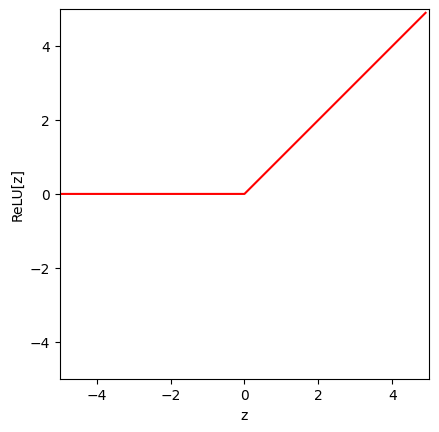

In [3]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

In [4]:
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # 1. Compute the three initial lines (Preactivations)
  # These are just linear regressions: y = theta_0 + theta_1 * x
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  # 2. Pass through ReLU to get activations
  # This "snaps" the lines at zero
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # 3. Weight the activations using phi parameters
  # This scales the "height" or "slope" of the ReLU shapes
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # 4. Combine weighted activations and add the offset (phi_0)
  # This sums the "bumps" together to create the final complex curve
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything for plotting purposes
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [6]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, x');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, x'); ax.set_ylabel('Output, y')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

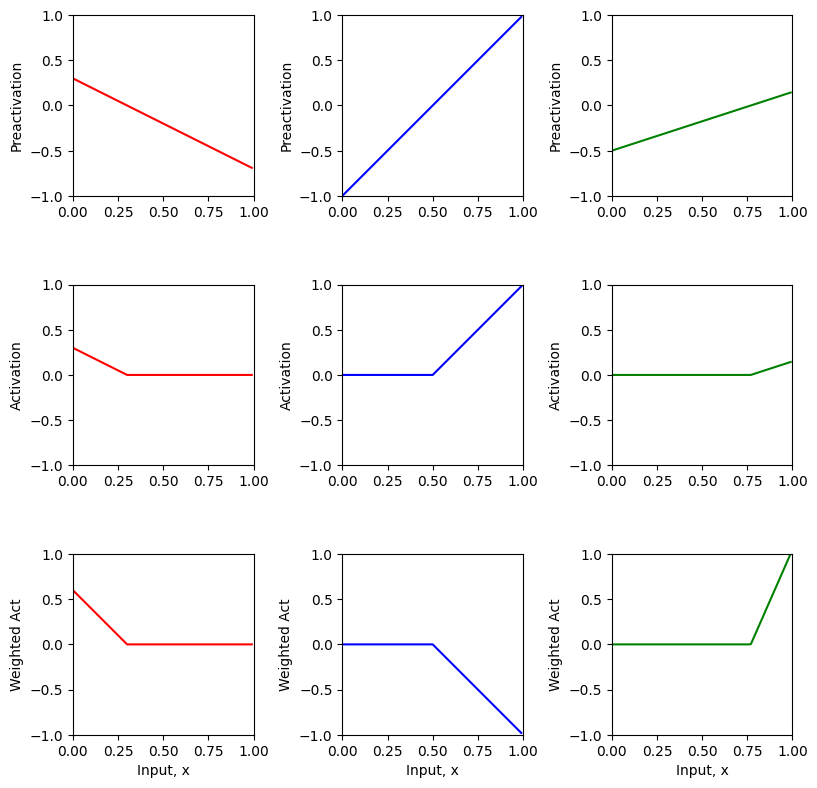

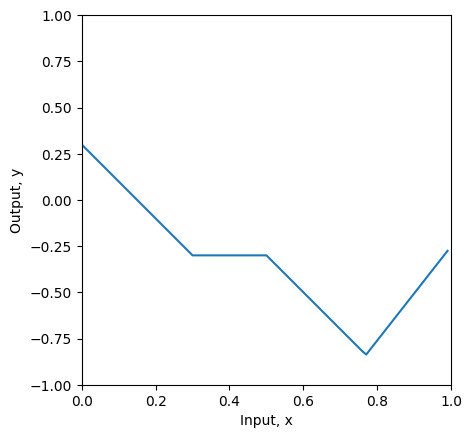

In [7]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

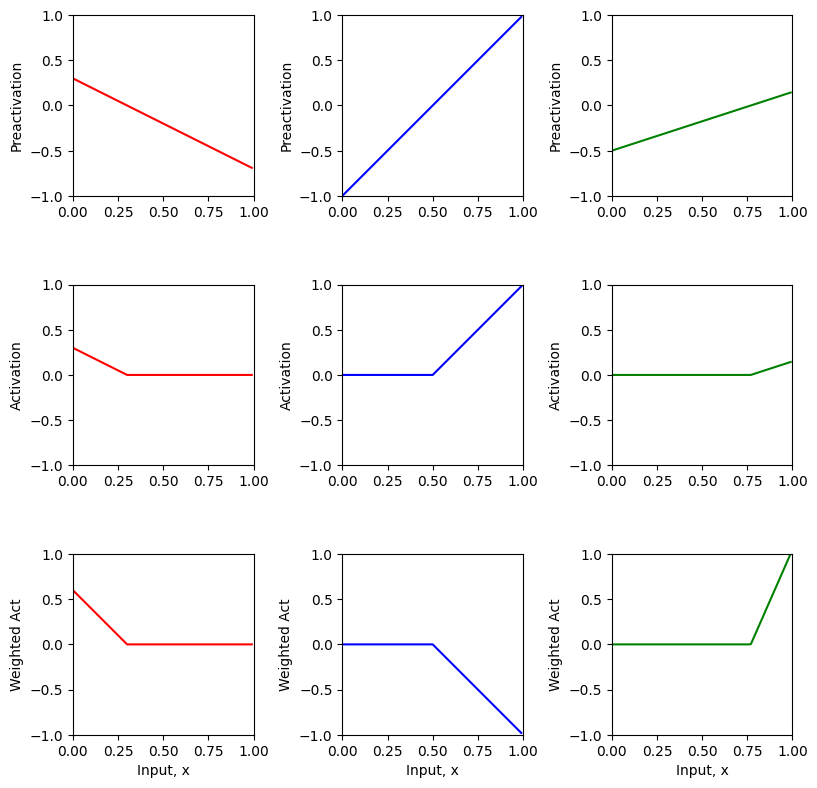

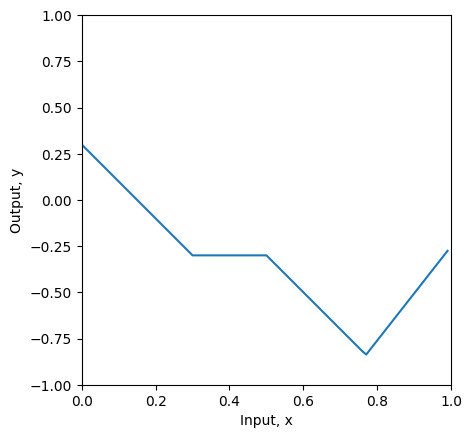

In [8]:
# Reset to original values first
theta_10 = 0.3;  theta_11 = -1.0
theta_20 = -1.0; theta_21 = 2.0
theta_30 = -0.5; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# --- EXPERIMENTS ---
# Task 1: Change phi_0 (e.g., to 0.5) to see vertical shift
# phi_0 = 0.5 

# Task 2: Multiply phis by 0.5 (Vertical compression)
# phi_1 *= 0.5; phi_2 *= 0.5; phi_3 *= 0.5 

# Task 3: Flip phi_1 (Invert first ReLU)
# phi_1 *= -1 

# Task 4: Change theta_20 to -1.2 (Shift second joint right)
# theta_20 = -1.2 

# Run and Plot
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

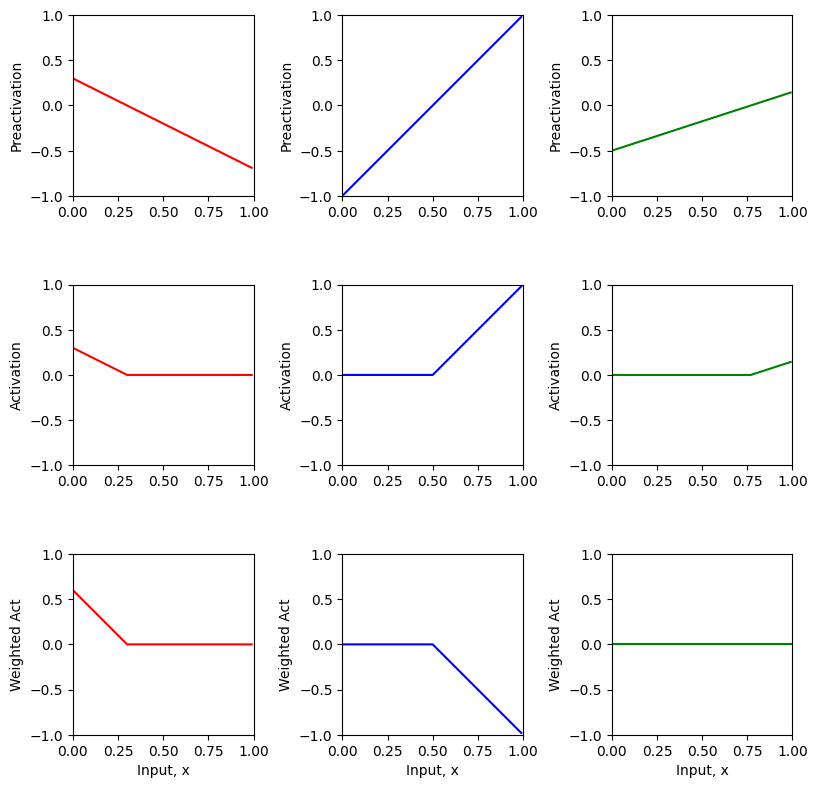

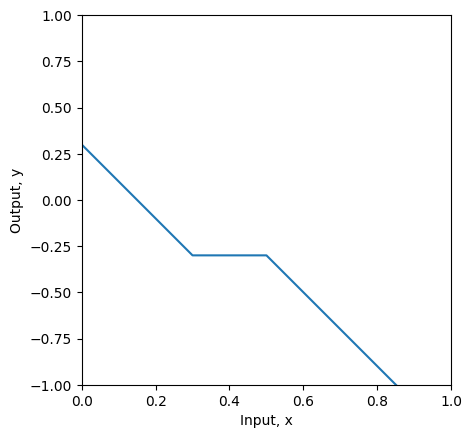

In [9]:
# Method: Set phi_3 to 0 to remove the third joint
phi_3 = 0.0

y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

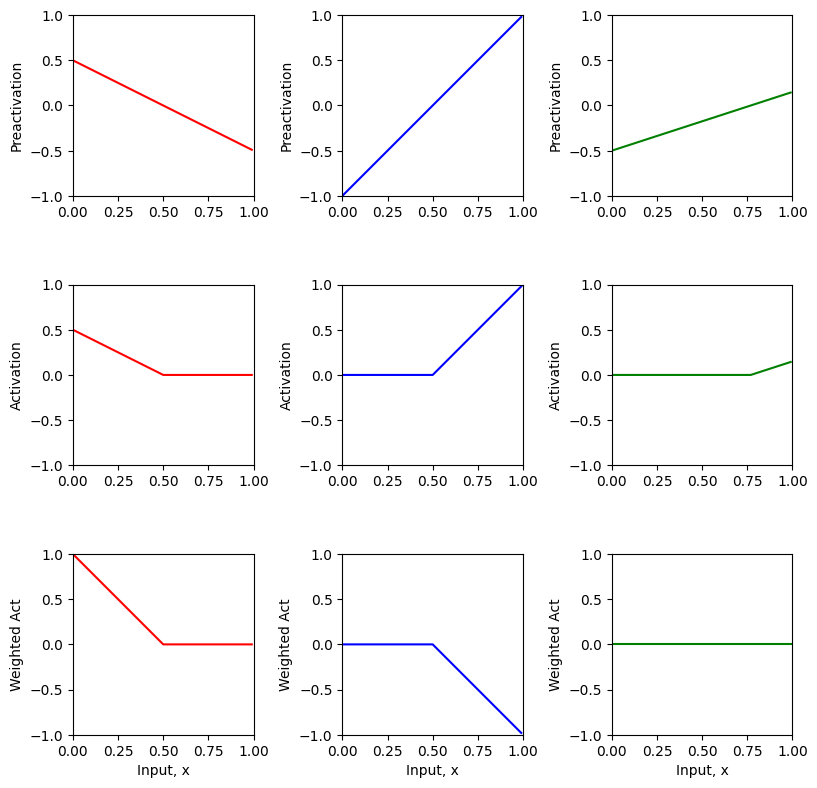

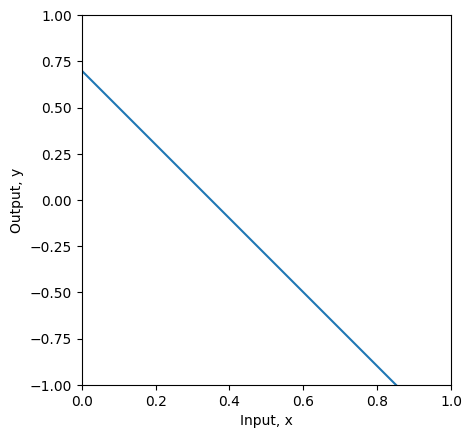

In [10]:
# Changing theta_10 to 0.5 shifts the first joint so the slopes don't cancel to zero in that range
theta_10 = 0.5 

y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

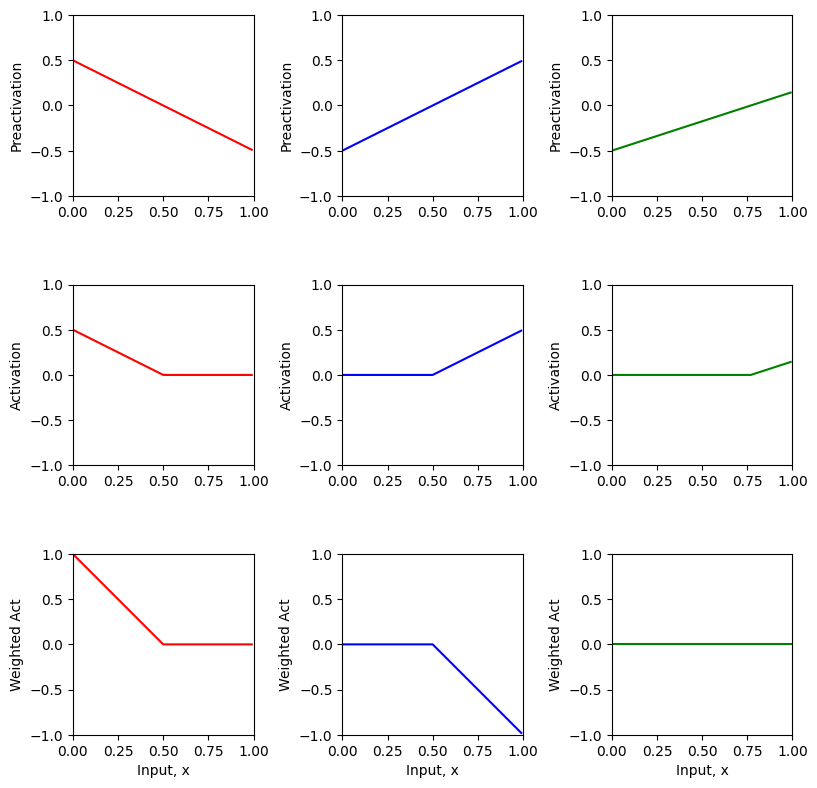

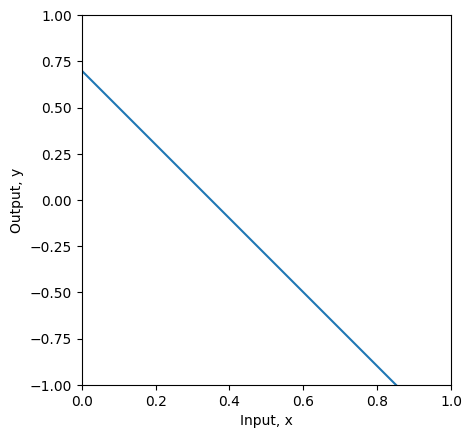

In [11]:
# Task 7: Scaling inside by 0.5 and outside by 2.0 (Should look identical to original)
theta_20_new = theta_20 * 0.5
theta_21_new = theta_21 * 0.5
phi_2_new = phi_2 * 2.0

# Task 8: Scaling by -0.5 and -2.0 (Should look DIFFERENT)
# theta_20_new = theta_20 * -0.5
# theta_21_new = theta_21 * -0.5
# phi_2_new = phi_2 * -2.0

y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2_new, phi_3, theta_10, theta_11, theta_20_new, theta_21_new, theta_30, theta_31)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [12]:
# Least squares function
def least_squares_loss(y_train, y_predict):
  # Equation: Loss = Σ(y_predict - y_train)^2
  # This calculates the total squared vertical distance between points and the model
  loss = np.sum((y_predict - y_train)**2)

  return loss

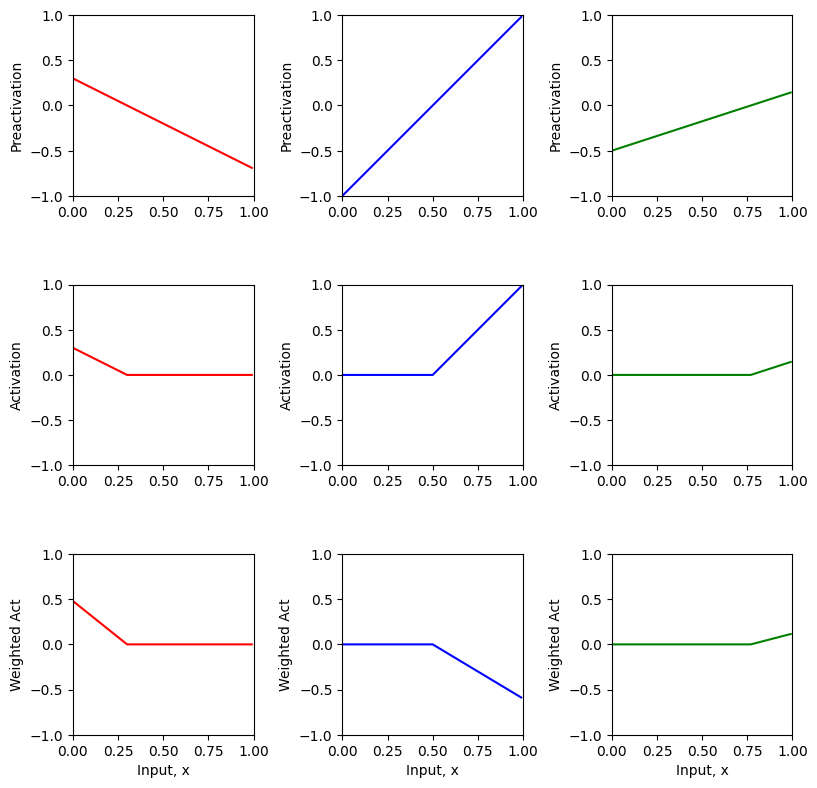

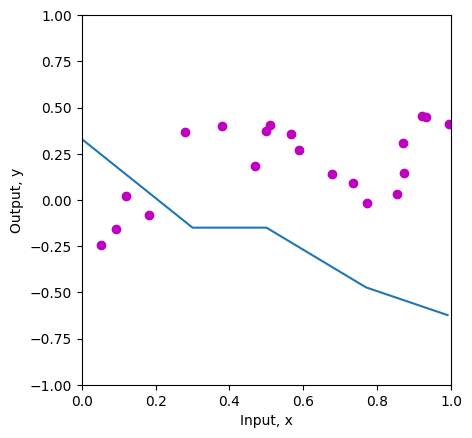

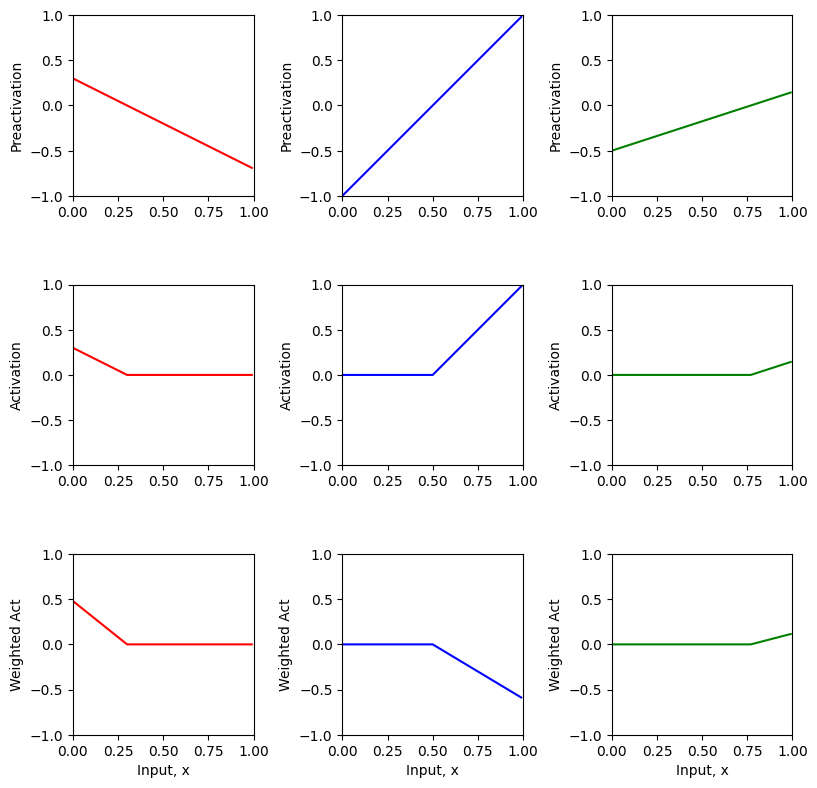

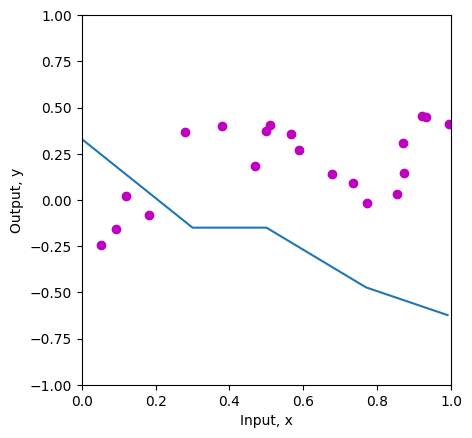

Your Loss = 7.693


In [14]:
import numpy as np

# 1. Define the data (Run this cell!)
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])

y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# 2. Define parameters
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0 ; theta_21 = 2.0
theta_30 = -0.5 ; theta_31 = 0.65
phi_0 = -0.15 ; phi_1 = 1.6 ; phi_2 = -0.6 ; phi_3 = 0.8

# 3. Define x range for plotting the blue line
x = np.arange(0,1,0.01)

# 4. Run the network
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# 5. Plot (This should now work)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data=x_train, y_data=y_train)

# --- EXPERIMENT BLOCK ---
# 1. Start by adjusting phi_0 to shift the whole curve up/down to the data center
# 2. Adjust phis to change the slopes of the segments
# 3. Adjust thetas to move the "joints" (knees) of the curve

theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0 ; theta_21 = 2.0
theta_30 = -0.5 ; theta_31 = 0.65

# Try these values to get the loss much lower (Targeting ~0.181)
phi_0 = -0.15   # Lifted slightly from -0.3
phi_1 = 1.6     # Reduced from 2.0
phi_2 = -0.6    # Adjusted from -1.0
phi_3 = 0.8     # Reduced significantly from 7.0

# Run the neural network for the plot range
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot with training data
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Run on training data and compute loss
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
loss = least_squares_loss(y_train,y_predict)

print('Your Loss = %3.3f'%(loss))